In [1]:
from data_processing import create_dataset

## REAL Summarization

Loaded 100 examples.
Dataset REALSumm train-dev-test split: 40 30 30
Train, dev, test set `litepyramid_recall` distribution


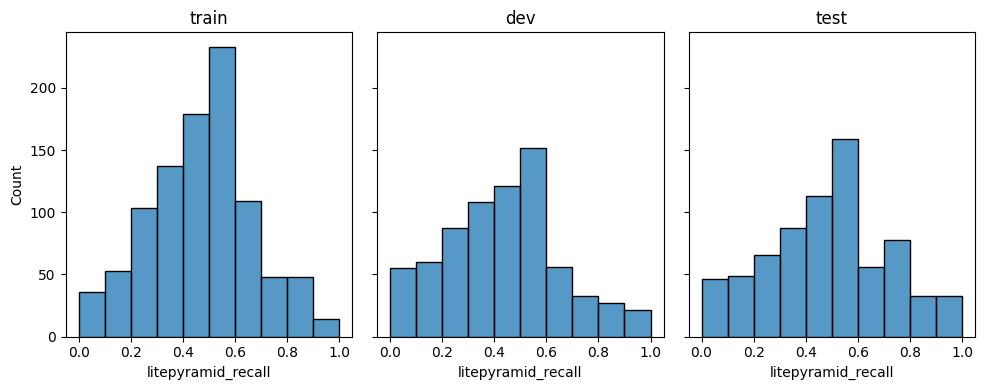

--------------------------------------------------------------------------------
2-class distribution using configs: {'q': 2, 'precision': 2}
--------------------------------------------------------------------------------
[0.         0.45454545 1.        ]
[-0.01        0.45454545  1.        ]


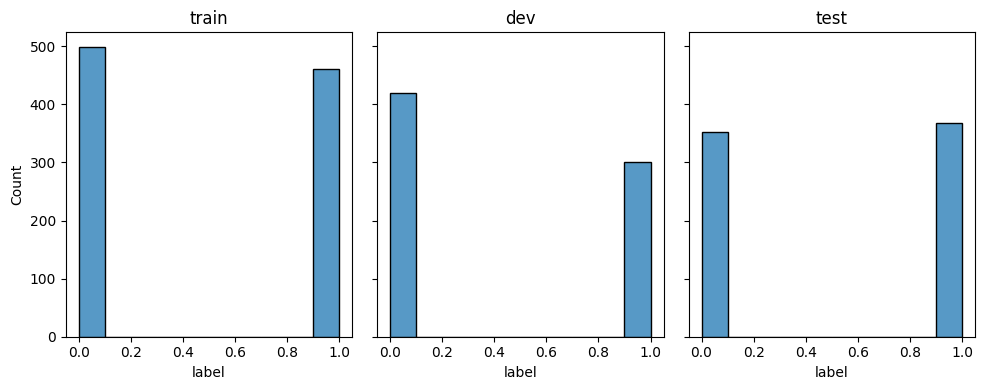

train
           index       bin
0  (-0.01, 0.45]  0.519792
1    (0.45, 1.0]  0.480208
dev
           index       bin
0  (-0.01, 0.45]  0.583333
1    (0.45, 1.0]  0.416667
test
           index       bin
0  (-0.01, 0.45]  0.488889
1    (0.45, 1.0]  0.511111
--------------------------------------------------------------------------------
5-Class distribution using configs: {'q': 5, 'precision': 2}
--------------------------------------------------------------------------------
[0.         0.30615385 0.42857143 0.5        0.625      1.        ]
[-0.01        0.30615385  0.42857143  0.5         0.625       1.        ]


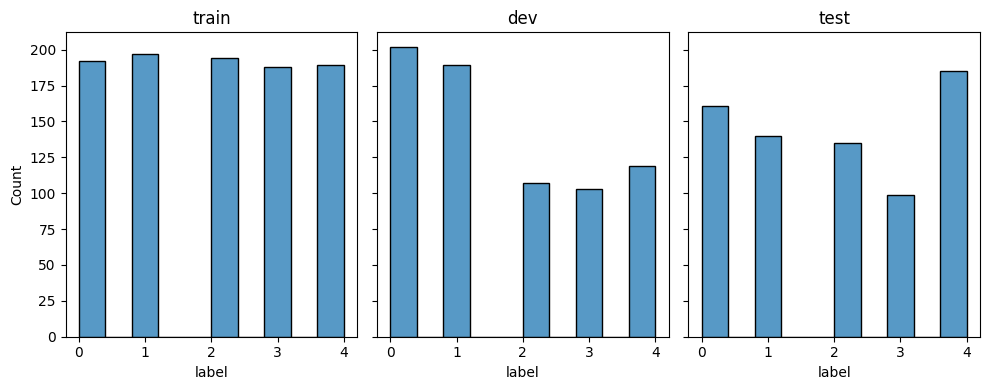

train
           index       bin
0  (-0.01, 0.31]  0.200000
1   (0.31, 0.43]  0.205208
2    (0.43, 0.5]  0.202083
3    (0.5, 0.62]  0.195833
4    (0.62, 1.0]  0.196875
dev
           index       bin
0  (-0.01, 0.31]  0.280556
1   (0.31, 0.43]  0.262500
2    (0.43, 0.5]  0.148611
3    (0.5, 0.62]  0.143056
4    (0.62, 1.0]  0.165278
test
           index       bin
0  (-0.01, 0.31]  0.223611
1   (0.31, 0.43]  0.194444
2    (0.43, 0.5]  0.187500
3    (0.5, 0.62]  0.137500
4    (0.62, 1.0]  0.256944











Loaded 100 examples.
Dataset REALSumm train-dev-test split: 40 30 30
Train, dev, test set `litepyramid_recall` distribution


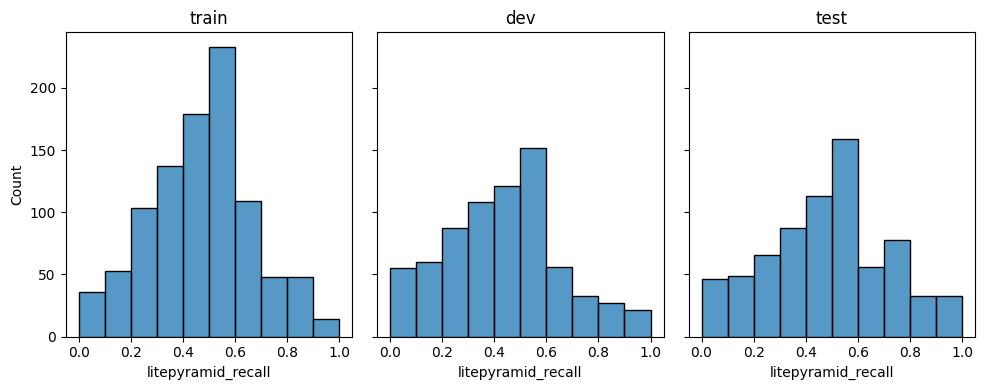

--------------------------------------------------------------------------------
2-class distribution using configs: {'binrange': (0, 1), 'bins': 2}
--------------------------------------------------------------------------------


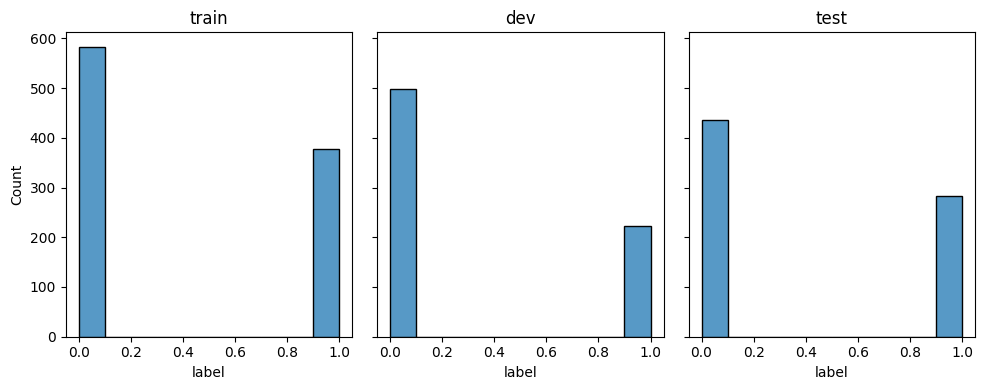

train
           index       bin
0  (-0.001, 0.5]  0.607292
1     (0.5, 1.0]  0.392708
dev
           index       bin
0  (-0.001, 0.5]  0.691667
1     (0.5, 1.0]  0.308333
test
           index       bin
0  (-0.001, 0.5]  0.605556
1     (0.5, 1.0]  0.394444
--------------------------------------------------------------------------------
5-Class distribution using configs: {'binrange': (0, 1), 'bins': 5}
--------------------------------------------------------------------------------


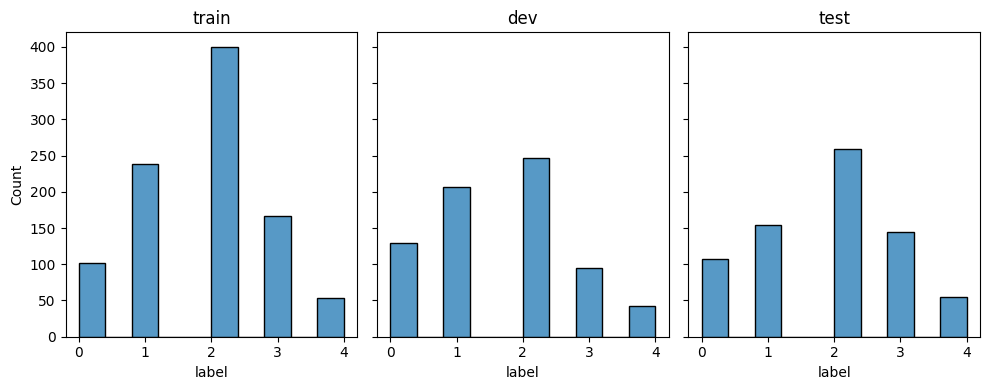

train
           index       bin
0  (-0.001, 0.2]  0.106250
1     (0.2, 0.4]  0.248958
2     (0.4, 0.6]  0.416667
3     (0.6, 0.8]  0.172917
4     (0.8, 1.0]  0.055208
dev
           index       bin
0  (-0.001, 0.2]  0.179167
1     (0.2, 0.4]  0.287500
2     (0.4, 0.6]  0.343056
3     (0.6, 0.8]  0.131944
4     (0.8, 1.0]  0.058333
test
           index       bin
0  (-0.001, 0.2]  0.148611
1     (0.2, 0.4]  0.213889
2     (0.4, 0.6]  0.359722
3     (0.6, 0.8]  0.201389
4     (0.8, 1.0]  0.076389


In [2]:
realsumm_metadata = {
    "dataset_name": "REALSumm",
    "col": "litepyramid_recall",
    "dev_fraction": 0.30,
    "test_fraction": 0.30,
    "seed": 71563,
    "raw_dataset_dir": "../datasets/summ_data",
    "output_dir": "../datasets/summ_data/REALSumm",
}

realsumm_outdir = realsumm_metadata.pop("output_dir")

# Create quantile-based distribution
train, dev, test = create_dataset(**realsumm_metadata, use_quantiles=True, output_dir=f"{realsumm_outdir}/quantile")

print("\n" * 10)
# Create equal-sized bin distribution
train_disc, dev_disc, test_disc = create_dataset(**realsumm_metadata, use_quantiles=False, output_dir=f"{realsumm_outdir}/equal-sized-bins")

In [3]:
train.groupby(["bartscore_doc_id"]).mean().describe()

,index,litepyramid_recall,mover_score,bart_score_src_hypo,bart_score_hypo_ref,bart_score_ref_hypo,bart_score_avg_f,bart_score_harm_f,bart_score_cnn_src_hypo,bart_score_cnn_hypo_ref,...,bart_score_cnn_avg_f_de_To be specific,bart_score_cnn_harm_f_de_To be specific,bart_score_cnn_ref_hypo_en,bart_score_cnn_ref_hypo_de,bart_score_cnn_hypo_ref_en,bart_score_cnn_hypo_ref_de,bart_score_cnn_avg_f_en,bart_score_cnn_avg_f_de,bart_score_cnn_harm_f_en,bart_score_cnn_harm_f_de
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,479.500000,0.468073,0.201933,-1.273154,-4.545715,-6.201393,-5.373554,-2.499961,-0.839019,-2.637382,...,-3.131439,-1.541895,-3.209377,-3.398557,-2.635260,-2.923703,-2.922318,-3.161130,-1.429171,-1.556882
std,280.570847,0.102433,0.089131,0.212987,0.682532,1.214009,0.713203,0.307179,0.176466,0.544653,...,0.392929,0.206082,0.380721,0.365432,0.542627,0.522473,0.411447,0.394970,0.218481,0.206685
min,11.500000,0.262500,0.046109,-1.777635,-6.089160,-9.449013,-7.368052,-3.279151,-1.311768,-3.974129,...,-3.993829,-1.986399,-4.057534,-4.181006,-3.961961,-4.174567,-3.879020,-4.072161,-1.929045,-2.026096
25%,245.500000,0.395172,0.114993,-1.411126,-4.845925,-7.141669,-5.824045,-2.709496,-0.941045,-3.049129,...,-3.311888,-1.645481,-3.459863,-3.646002,-3.046539,-3.304146,-3.160753,-3.351466,-1.558720,-1.662711
50%,479.500000,0.476763,0.194835,-1.308185,-4.525093,-5.940865,-5.243986,-2.491282,-0.832055,-2.616705,...,-3.159654,-1.550042,-3.210474,-3.447441,-2.617934,-2.943550,-2.944443,-3.200609,-1.429384,-1.571741
75%,713.500000,0.545501,0.283606,-1.095259,-4.182167,-5.279650,-4.889033,-2.251952,-0.730930,-2.206098,...,-2.860609,-1.407759,-2.994126,-3.201456,-2.204388,-2.543813,-2.638655,-2.885362,-1.284103,-1.415404
max,947.500000,0.645833,0.355439,-0.915476,-3.224985,-4.647619,-3.954331,-1.894614,-0.528012,-1.684004,...,-2.340600,-1.135732,-2.475412,-2.684937,-1.683329,-1.975098,-2.100640,-2.386677,-0.997736,-1.160003


In [4]:
dev.groupby(["bartscore_doc_id"]).mean().describe()

,index,litepyramid_recall,mover_score,bart_score_src_hypo,bart_score_hypo_ref,bart_score_ref_hypo,bart_score_avg_f,bart_score_harm_f,bart_score_cnn_src_hypo,bart_score_cnn_hypo_ref,...,bart_score_cnn_avg_f_de_To be specific,bart_score_cnn_harm_f_de_To be specific,bart_score_cnn_ref_hypo_en,bart_score_cnn_ref_hypo_de,bart_score_cnn_hypo_ref_en,bart_score_cnn_hypo_ref_de,bart_score_cnn_avg_f_en,bart_score_cnn_avg_f_de,bart_score_cnn_harm_f_en,bart_score_cnn_harm_f_de
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,359.500000,0.426468,0.188543,-1.209067,-4.654191,-6.051663,-5.352927,-2.469427,-0.773087,-2.676263,...,-3.138200,-1.551129,-3.173578,-3.375464,-2.674130,-2.956452,-2.923854,-3.165958,-1.437432,-1.564756
std,211.281802,0.135614,0.081144,0.172136,0.984282,1.287706,0.878833,0.396954,0.129750,0.531182,...,0.432406,0.221422,0.420638,0.403029,0.528118,0.519392,0.446768,0.435593,0.230733,0.222994
min,11.500000,0.150000,0.049557,-1.537383,-6.348114,-8.836879,-7.031165,-3.339899,-1.012100,-3.806522,...,-4.052265,-2.021404,-4.025664,-4.183577,-3.792863,-4.018152,-3.909263,-4.100864,-1.949255,-2.045446
25%,185.500000,0.343998,0.137727,-1.280943,-5.427071,-6.821409,-5.798004,-2.698129,-0.857441,-3.026444,...,-3.414725,-1.692314,-3.402514,-3.629426,-3.005060,-3.286466,-3.214838,-3.444987,-1.594376,-1.708655
50%,359.500000,0.421608,0.186436,-1.220893,-4.651574,-5.931227,-5.503005,-2.582767,-0.796727,-2.699397,...,-3.174579,-1.576069,-3.137569,-3.337481,-2.692579,-2.954984,-2.935144,-3.177768,-1.456528,-1.576930
75%,533.500000,0.493109,0.226877,-1.121839,-3.914624,-5.353006,-4.897256,-2.196777,-0.690739,-2.360327,...,-2.863684,-1.411415,-2.938051,-3.159016,-2.352840,-2.665623,-2.643442,-2.888945,-1.304309,-1.424432
max,707.500000,0.682692,0.441183,-0.891767,-3.061824,-3.354144,-3.234608,-1.602380,-0.519600,-1.708698,...,-2.221104,-1.078366,-2.316595,-2.548899,-1.709834,-1.972896,-2.025308,-2.268812,-0.972489,-1.104226


In [5]:
test.groupby(["bartscore_doc_id"]).mean().describe()

,index,litepyramid_recall,mover_score,bart_score_src_hypo,bart_score_hypo_ref,bart_score_ref_hypo,bart_score_avg_f,bart_score_harm_f,bart_score_cnn_src_hypo,bart_score_cnn_hypo_ref,...,bart_score_cnn_avg_f_de_To be specific,bart_score_cnn_harm_f_de_To be specific,bart_score_cnn_ref_hypo_en,bart_score_cnn_ref_hypo_de,bart_score_cnn_hypo_ref_en,bart_score_cnn_hypo_ref_de,bart_score_cnn_avg_f_en,bart_score_cnn_avg_f_de,bart_score_cnn_harm_f_en,bart_score_cnn_harm_f_de
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,359.500000,0.477738,0.207323,-1.230199,-4.516460,-6.229802,-5.373131,-2.476852,-0.787241,-2.718405,...,-3.154134,-1.561683,-3.144800,-3.344634,-2.716355,-3.019410,-2.930578,-3.182022,-1.443043,-1.575742
std,211.281802,0.127841,0.108038,0.210722,0.891403,1.717205,0.984780,0.399505,0.182642,0.459691,...,0.378704,0.191359,0.425278,0.392557,0.459908,0.451960,0.401320,0.386136,0.204739,0.195071
min,11.500000,0.226190,-0.022091,-1.687896,-6.427181,-10.573115,-7.397003,-3.196425,-1.114605,-3.552911,...,-3.812989,-1.889016,-3.944569,-4.083537,-3.551079,-3.935454,-3.622698,-3.847590,-1.782942,-1.905144
25%,185.500000,0.379735,0.130168,-1.332312,-5.079942,-6.976042,-5.856315,-2.741926,-0.934625,-2.967838,...,-3.368995,-1.674547,-3.484499,-3.600938,-2.976923,-3.236568,-3.177570,-3.414602,-1.572828,-1.693551
50%,359.500000,0.489240,0.207622,-1.205802,-4.342021,-6.342739,-5.580907,-2.477566,-0.815294,-2.718699,...,-3.166990,-1.569841,-3.159484,-3.384938,-2.708434,-3.006670,-2.957947,-3.213034,-1.461484,-1.591287
75%,533.500000,0.571875,0.295647,-1.100015,-3.949715,-4.772145,-4.809108,-2.312229,-0.650869,-2.463232,...,-2.990080,-1.482600,-2.874466,-3.105648,-2.460638,-2.748075,-2.733547,-2.987828,-1.345156,-1.480617
max,707.500000,0.750000,0.419083,-0.782911,-2.627217,-3.157680,-3.333650,-1.558506,-0.430365,-1.703579,...,-2.275558,-1.125392,-2.279651,-2.487913,-1.703996,-2.054163,-2.047660,-2.302650,-1.003182,-1.138384


## SummEval

In [ ]:
summeval_metadata = lambda col: {
    "dataset_name": "SummEval",
    "col": col,
    "dev_fraction": 0.30,
    "test_fraction": 0.30,
    "seed": 498151,
    "raw_dataset_dir": "../datasets/summ_data",
    "output_dir": f"../datasets/summ_data/SummEval_{col}/",
    "scale": (1, 5),
}

### Consistency

In [ ]:
summeval_metadata_coh = summeval_metadata("coherence")
print(summeval_metadata_coh)

train_coh, dev_coh, test_coh = create_dataset(**summeval_metadata_coh)

### Relevance

In [ ]:
summeval_metadata_rel = summeval_metadata("relevance")
print(summeval_metadata_rel)

train_rel, dev_rel, test_rel = create_dataset(**summeval_metadata_rel)

### Consistency

In [ ]:
summeval_metadata_con = summeval_metadata("consistency")
print(summeval_metadata_con)

train_con, dev_con, test_con = create_dataset(**summeval_metadata_con)

### Fluency

In [ ]:
summeval_metadata_flu = summeval_metadata("fluency")
print(summeval_metadata_flu)

train_flu, dev_flu, test_flu = create_dataset(**summeval_metadata_flu)

## NewsRoom 18

In [ ]:
ner_metadata = lambda col: {
    "dataset_name": "Newsroom",
    "col": col,
    "dev_fraction": 0.30,
    "test_fraction": 0.30,
    "seed": 498151,
    "raw_dataset_dir": "./data/summarization",
    "output_dir": f"./data/summarization/NeR18_{col}/",
    "scale": (1, 5),
}

# 'coherence': 2.66, 
# 'fluency': 3.33,
# 'informativeness': 2.67,
# 'relevance': 3.0

In [ ]:
ner_metadata_flu = ner_metadata("fluency")
print(ner_metadata_flu)

train_flu, dev_flu, test_flu = create_dataset(**ner_metadata_flu)

In [ ]:
ner_metadata_coh = ner_metadata("coherence")
print(ner_metadata_coh)

train_coh, dev_coh, test_coh = create_dataset(**ner_metadata_coh)

In [ ]:
ner_metadata_rel = ner_metadata("relevance")
print(ner_metadata_rel)

train_rel, dev_rel, test_rel = create_dataset(**ner_metadata_rel)

In [ ]:
ner_metadata_info = ner_metadata("informativeness")
print(ner_metadata_info)

train_info, dev_info, test_info = create_dataset(**ner_metadata_info)

## Summarization Factuality Datasets

### Rank18 (needs cross-reference --- only has relative comparison 0/1 fact scores)

In [ ]:
joblib.load("./data/summarization/QAGS_CNN_data_raw.pkl")

### QAGS

In [ ]:
qags_cnn_metadata = {
    "dataset_name": "QAGS_CNN",
    "col": "fact",
    "dev_fraction": 0.30,
    "test_fraction": 0.30,
    "seed": 498151,
    "raw_dataset_dir": "./data/summarization",
    "output_dir": "./data/summarization/QAGS_CNN",
}

create_dataset(**qags_cnn_metadata);

### QAGS-XSUM (binary only) (?)

In [ ]:
qags_cnn_metadata = {
    "dataset_name": "QAGS_XSUM",
    "col": "fact",
    "dev_fraction": 0.30,
    "test_fraction": 0.30,
    "seed": 498151,
    "raw_dataset_dir": "./data/summarization",
    "output_dir": "./data/summarization/QAGS_XSUM",
}

create_dataset(**qags_cnn_metadata);

In [ ]:
joblib.load("./data/summarization/QAGS_XSUM_data_raw.pkl")[20]